# FLIGHT PRICE PREDICTION

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import seed
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

DATASET

+ IMPORTING DATA_TRAIN DATASET

In [2]:
data_train= pd.read_excel("C:/Users/user/Desktop/DT Python/Data-Science-ML-Capstone-Projects-master/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
pd.set_option('display.max_columns',None)
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
data_train.shape

(10683, 11)

data_train dataset has 10683 rows and 11 columns

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
data_train.iterrows

<bound method DataFrame.iterrows of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LK

In [8]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# take care of Null values to drop the row containing value
data_train.dropna(inplace=True)

In [10]:
# checking the shape
data_train.shape

(10682, 11)

In [11]:
data_train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [12]:
data_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
data_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [14]:
data_train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [15]:
data_train["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [16]:
data_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [17]:
data_train["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [18]:
data_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [19]:
data_train[data_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


there are duplicates in the data_train dataset so, now it has to be drop in the next column

In [20]:
# dropping the duplicates except keeping the first
data_train.drop_duplicates(keep='first',inplace=True)
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
data_train["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [22]:
data_train.shape

(10462, 11)

now, the data_train shape has reduced froom 10462 rows and 11 columns

+ IMPORTING TEST_SET_DF DATASET

In [23]:
test_set_df=pd.read_excel("C:/Users/user/Desktop/DT Python/Data-Science-ML-Capstone-Projects-master/Flight_Ticket_Participant_Datasets/Test_set.xlsx")
test_set_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [24]:
test_set_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [25]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [26]:
test_set_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [27]:
test_set_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


<Figure size 1440x720 with 0 Axes>

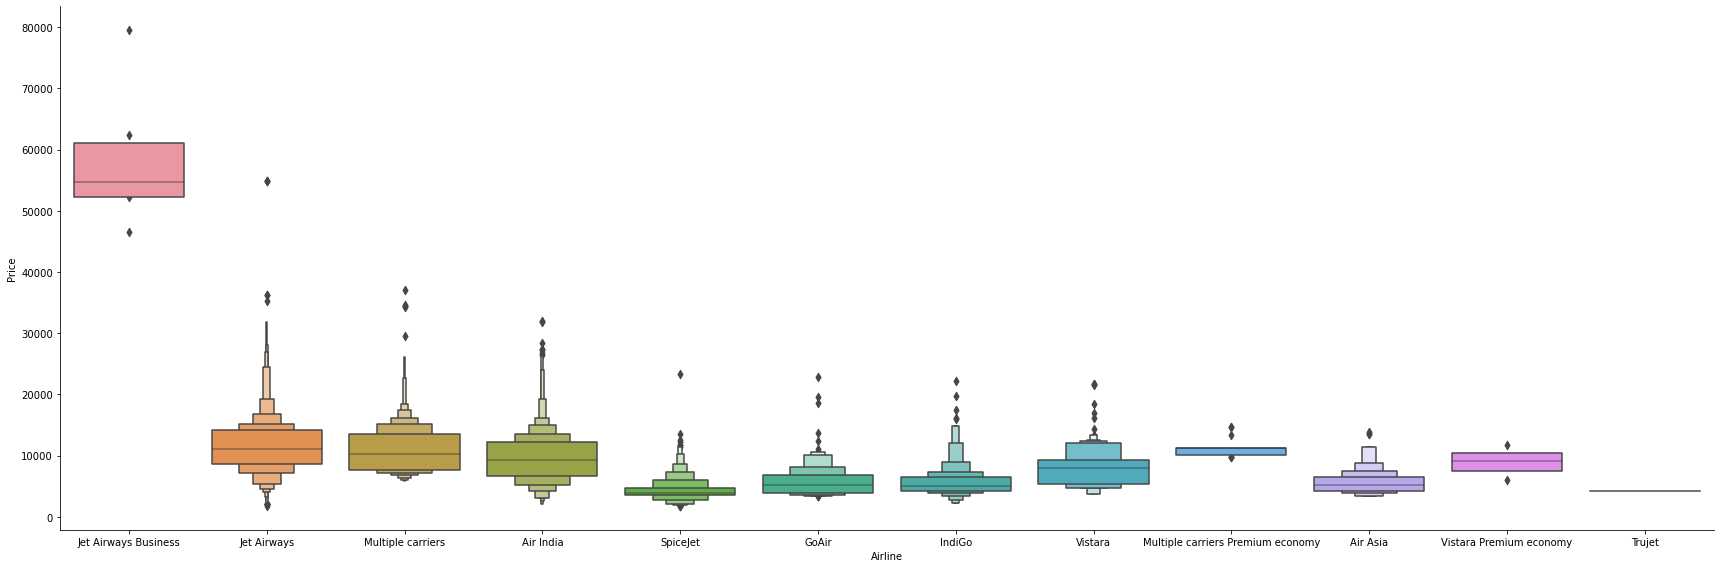

In [28]:
plt.figure(figsize=(20,10))
sns.catplot(y="Price", x="Airline",data=data_train.sort_values("Price", ascending=False), kind="boxen",height=8, aspect=3);

in this catplot  trying to plot the boxplot between the price of the flight and airline and there is the result that Jet Airways has the most outliers according to price

<AxesSubplot:>

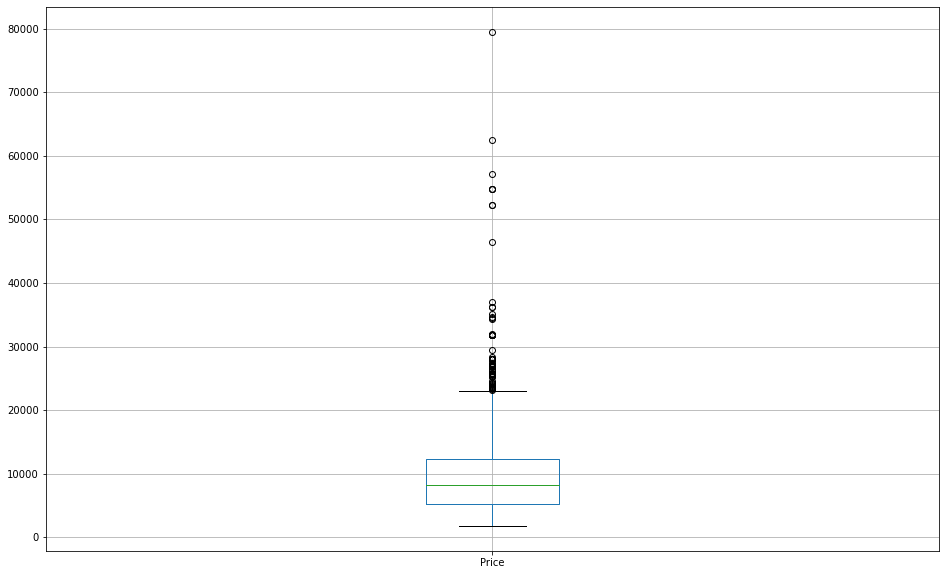

In [29]:
plt.figure(figsize=(16,10))
data_train.boxplot()

In [30]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


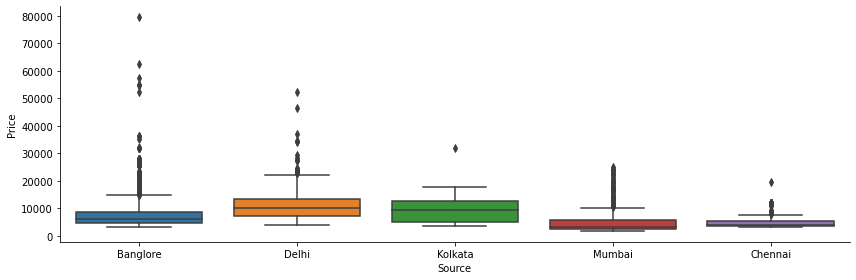

In [31]:
sns.catplot(y="Price",x="Source",data=data_train.sort_values("Price",ascending=False),kind="box",height=4,aspect=3)

the price of the flight and the source place from where passengers wqill travel to the destination and we can see that Bangalore as the source location has the most outliers while chennai has the least

In [32]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [33]:
data_train[ 'Duration' ] = data_train[ 'Duration' ].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_set_df['Duration'] = test_set_df['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [34]:
# organize the format of the date of journey in the dataset
data_train["Journey_day"] = data_train['Date_of_Journey'].str.split('/').str[0].astype(int)
data_train["Journey_month"] = data_train['Date_of_Journey'].str.split('/').str[1].astype(int)
data_train.drop(["Date_of_Journey"],axis=1,inplace=True)

changes date_of_journey into intgers because it is no of use in the column and instead of this journey_day , journey_month has to come in the column

In [35]:
# converting the arrival time
data_train["Arrival_Hour"]=pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train["Arrival_Minute"]=pd.to_datetime(data_train.Arrival_Time).dt.minute
data_train.drop(["Arrival_Time"], axis=1,inplace=True)

changes Arrival_Time  into intgers because it is no of use in the column and instead of this Arrival_Hour, Arrival_Minute has to come in the column

In [36]:
# converting the departure time
data_train["Dep_Hour"]=pd.to_datetime(data_train["Dep_Time"]).dt.hour
data_train["Dep_Minute"]=pd.to_datetime(data_train["Dep_Time"]).dt.minute
data_train.drop(["Dep_Time"],axis=1,inplace=True)

changes Dep_Time into intgers because it is no of use in the column and instead of this Dep_Hour, Dep_Minute has to come in the column

In [37]:
# Let's check into the dataset whether it change it or not
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,21,35,16,50


In [38]:
type(data_train.corr())

pandas.core.frame.DataFrame

PLOTTING CORRELATION

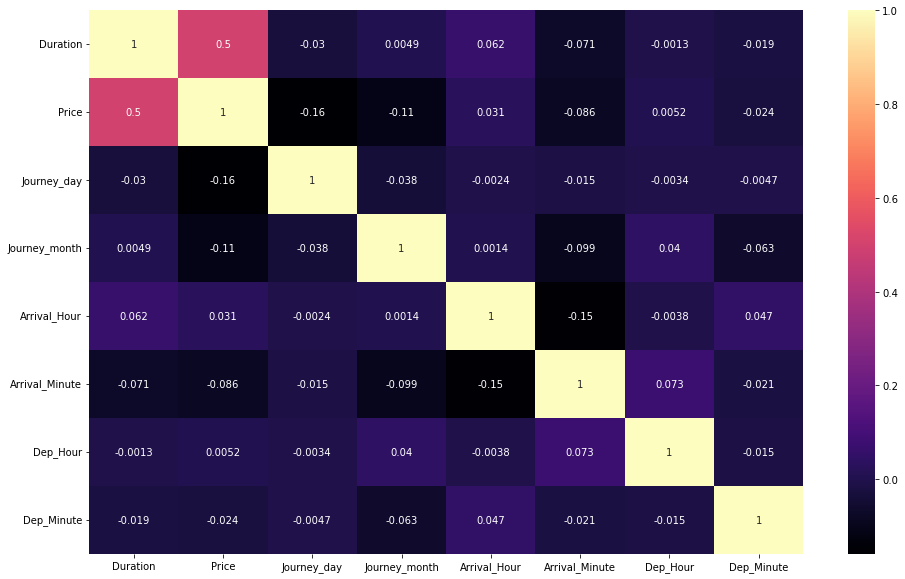

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(data_train.corr(), annot=True, cmap="magma")
plt.show()

CHECKING THE OUTLIER

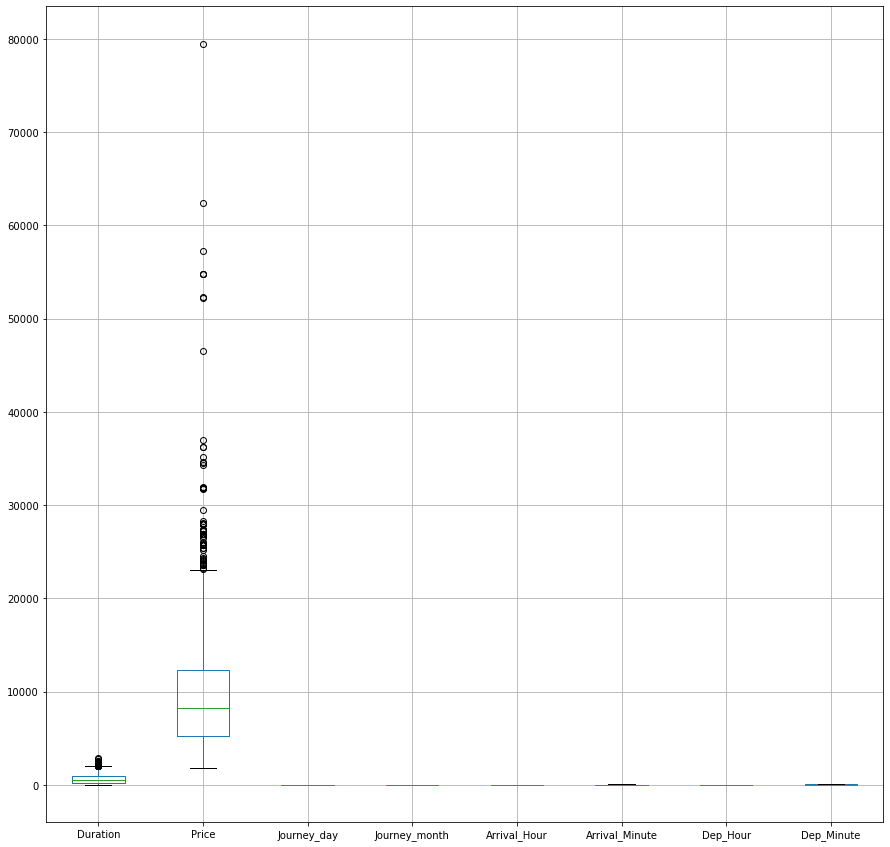

In [40]:
plt.figure(figsize=(15,15))
data_train.boxplot()
plt.show()

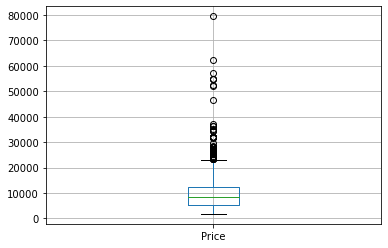

In [41]:
data_train.boxplot(column=["Price"])
plt.show()

REMOVE THE OUTLIER

In [42]:
# remove the outliers from price
def removeOutlier(col):
    sorted(col)
    quant1, quant2 = col.quantile([0.25,0.75])
    IQR = quant2 - quant1
    lowerRange = quant1 - (1.5 * IQR)
    upperRange = quant2 + (1.5 * IQR)
    return lowerRange, upperRange

In [43]:
lowScore, highScore = removeOutlier(data_train["Price"])
data_train['Price'] = np.where(data_train['Price']>highScore,highScore,data_train['Price'])
data_train['Price'] = np.where(data_train['Price']<lowScore,lowScore,data_train['Price'])

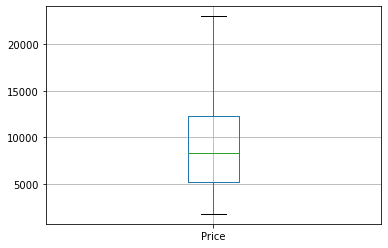

In [44]:
data_train.boxplot(column=['Price'])
plt.show()

finally, the data is now free from outliers

<AxesSubplot:xlabel='Price', ylabel='Duration'>

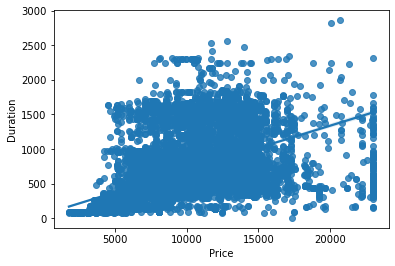

In [45]:
sns.regplot(x='Price',y='Duration',data=data_train)

<AxesSubplot:xlabel='Price', ylabel='Duration'>

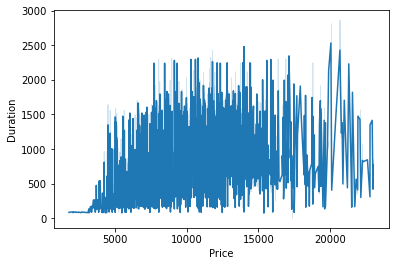

In [46]:
sns.lineplot(x='Price',y='Duration',data=data_train)

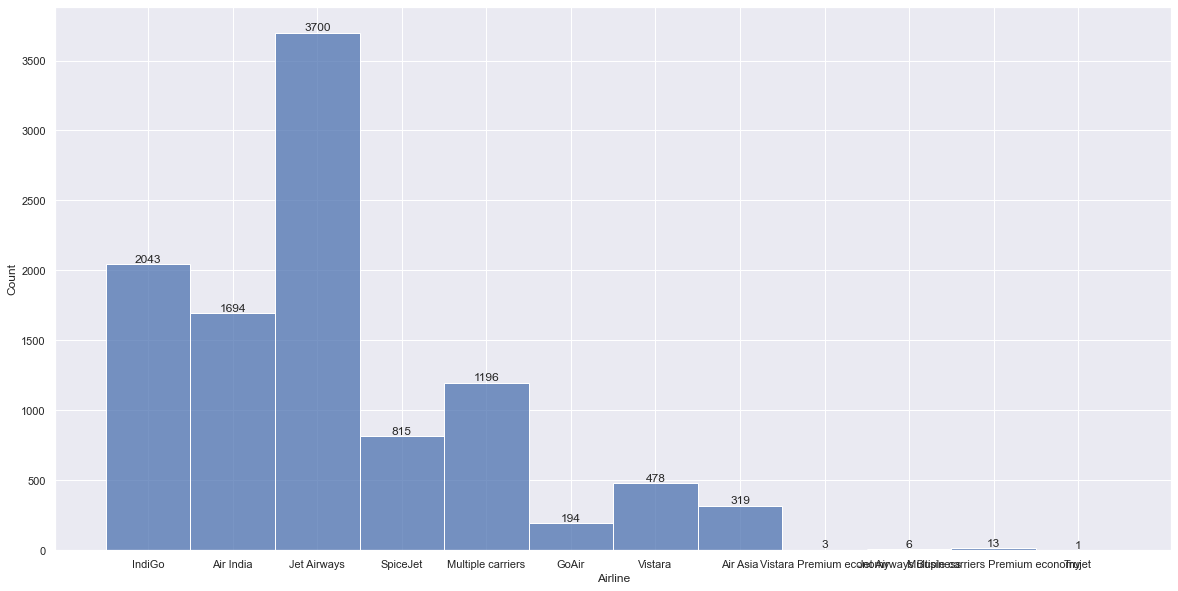

In [47]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
ax=sns.histplot(data=data_train,x=data_train["Airline"], binwidth=10, palette='rocket')
for i in ax.containers:
    ax.bar_label(i,)
    data_train["Airline"].shape

here, jet airways has the highest accuracy

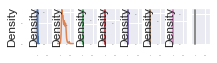

In [48]:
data_train.plot(kind='density',subplots=True,layout=(5,15), legend=False, fontsize=1);

<AxesSubplot:xlabel='Airline', ylabel='Price'>

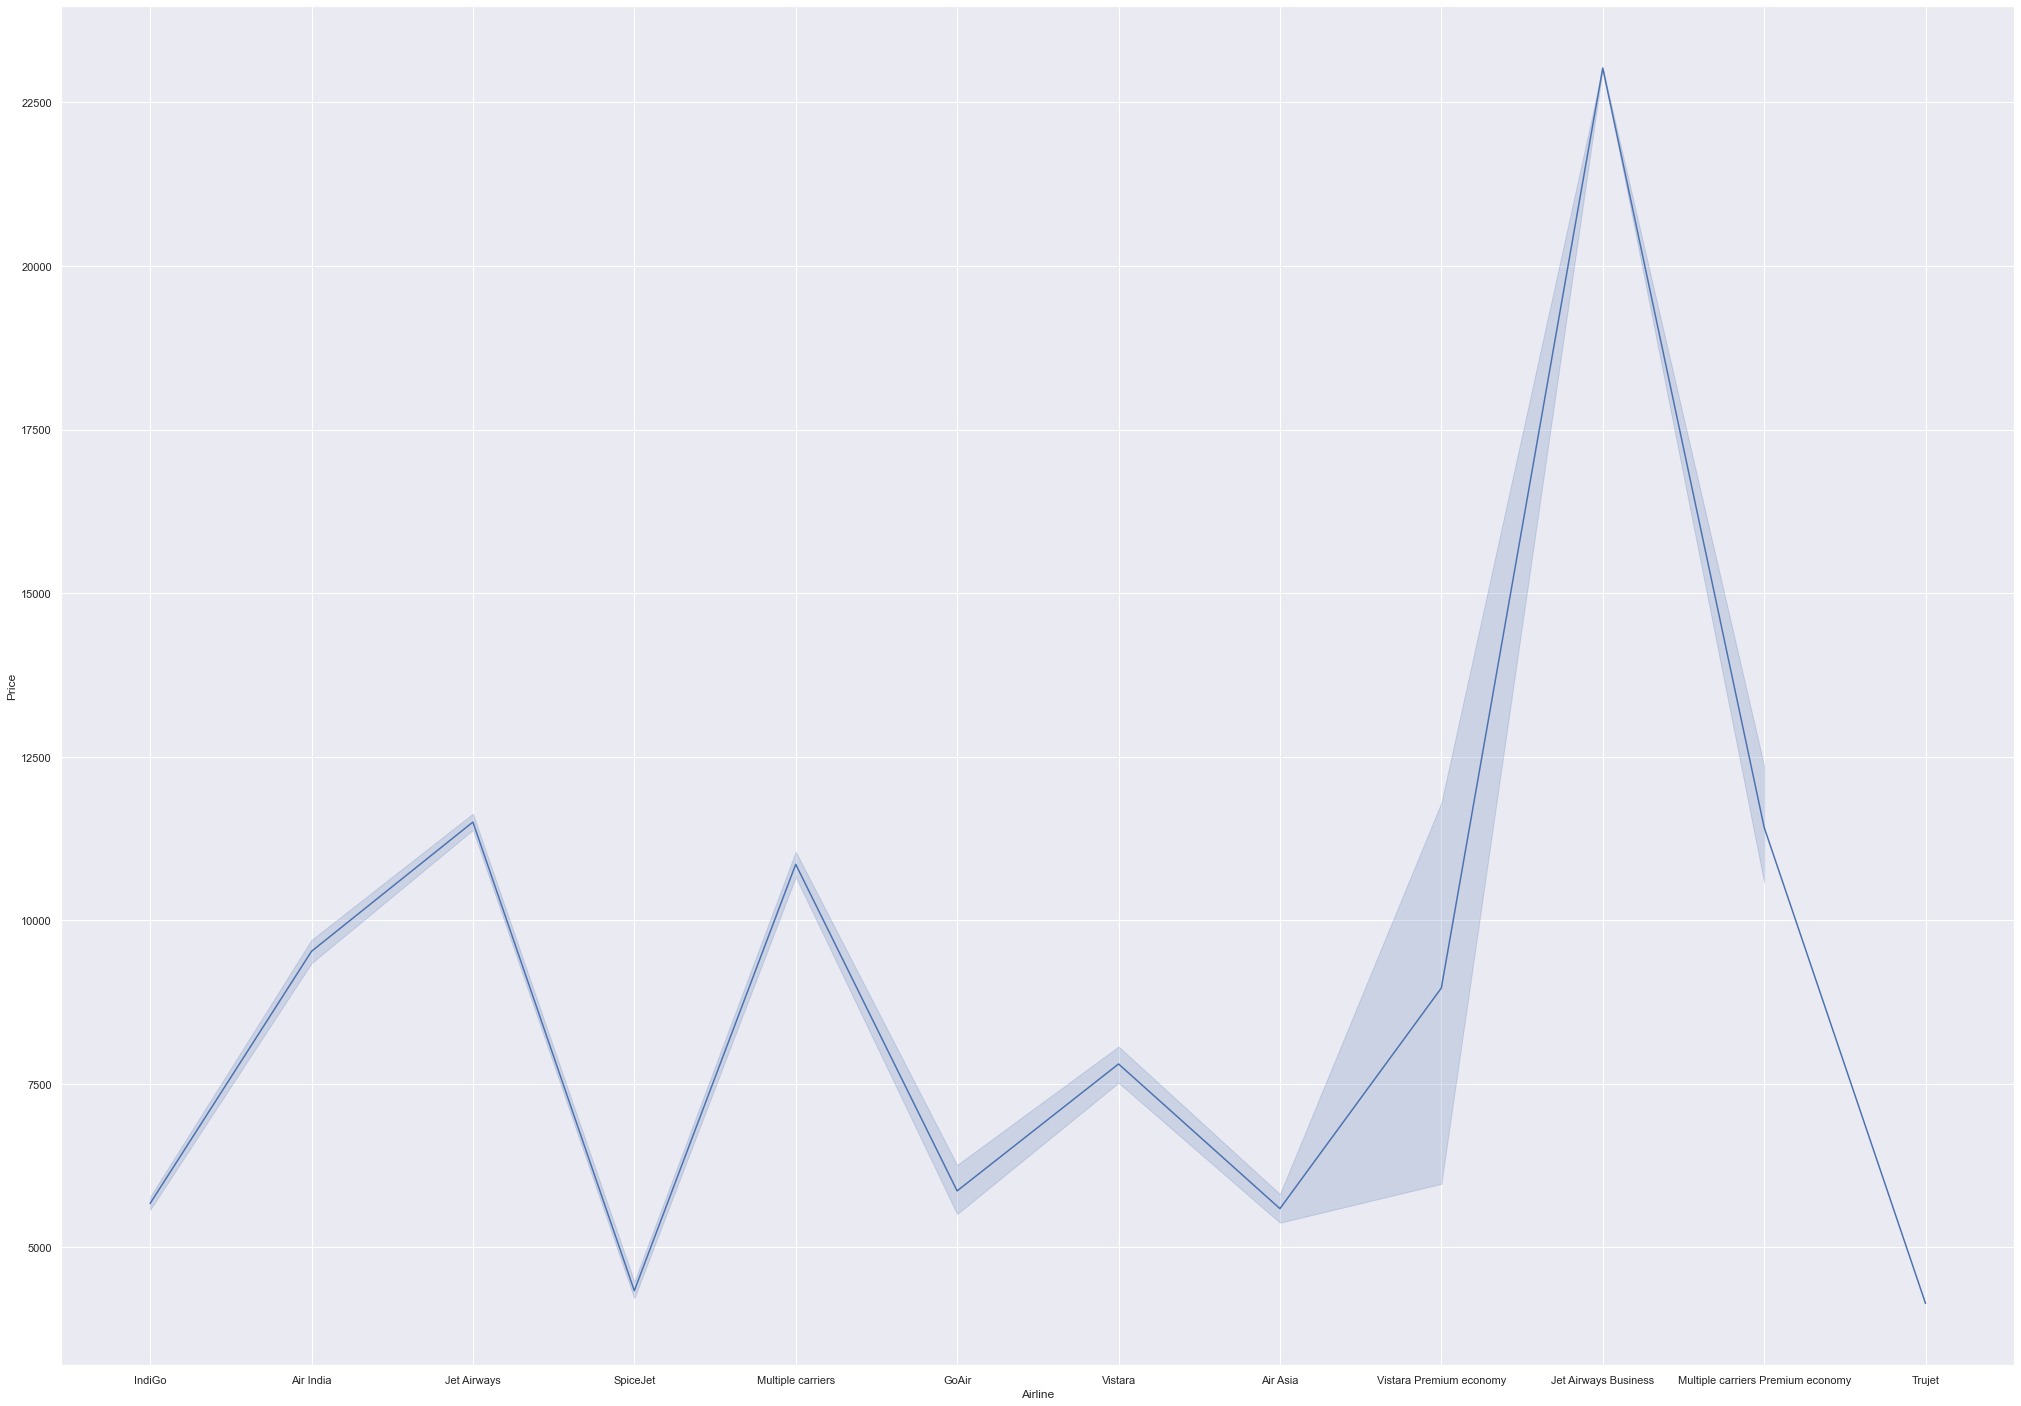

In [49]:
plt.figure(figsize=(35,25))
sns.lineplot(x='Airline',y='Price',data=data_train)

here, the jet airways business has the highest accuracy 

In [50]:
data_train.groupby('Airline')['Price'].agg(np.mean).sort_values(ascending=False)

Airline
Jet Airways Business                 23025.875000
Jet Airways                          11499.472500
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10853.540761
Air India                             9523.551432
Vistara Premium economy               8962.333333
Vistara                               7801.355649
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5590.260188
SpiceJet                              4335.545859
Trujet                                4140.000000
Name: Price, dtype: float64

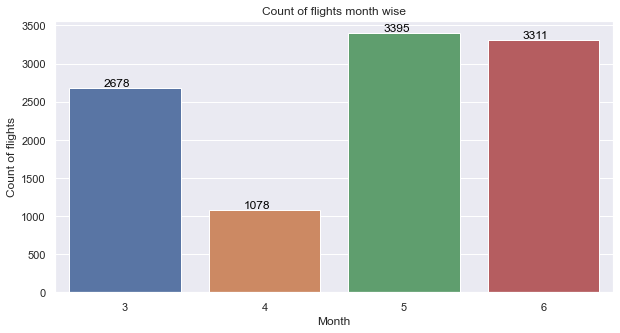

In [51]:
# countplot for journey in a month vs several flights
plt.figure(figsize=(10,5))
plt.title('Count of flights month wise')
ax=sns.countplot(x='Journey_month',data=data_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for i  in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom',color='black')

here, May has the most number of flights (as May denotes 5 in countplot graph)

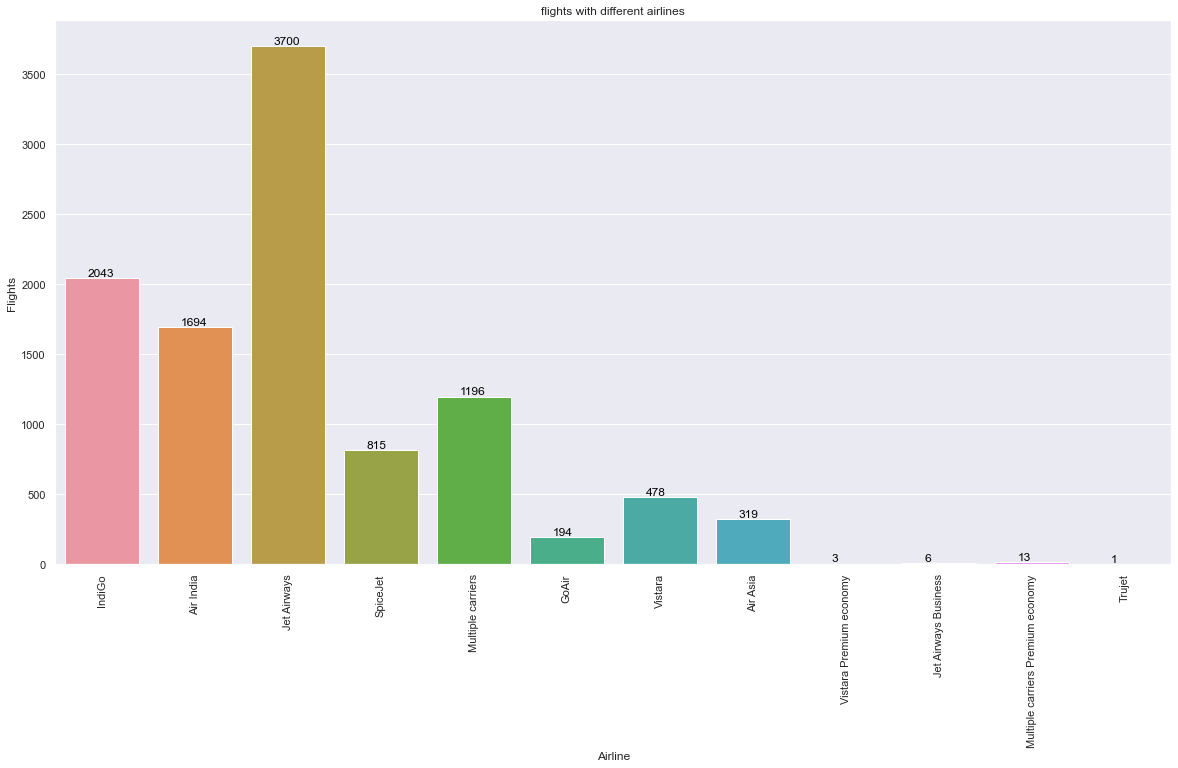

In [52]:
# bar chart for types of airline vs number of flights
plt.figure(figsize=(20,10))
plt.title('flights with different airlines')
ax=sns.countplot(x='Airline',data=data_train)
plt.xlabel('Airline')
plt.ylabel('Flights')
plt.xticks(rotation=90)
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom', color='black')

here the type of airline and count of flights that jet airways has the most flight boarded

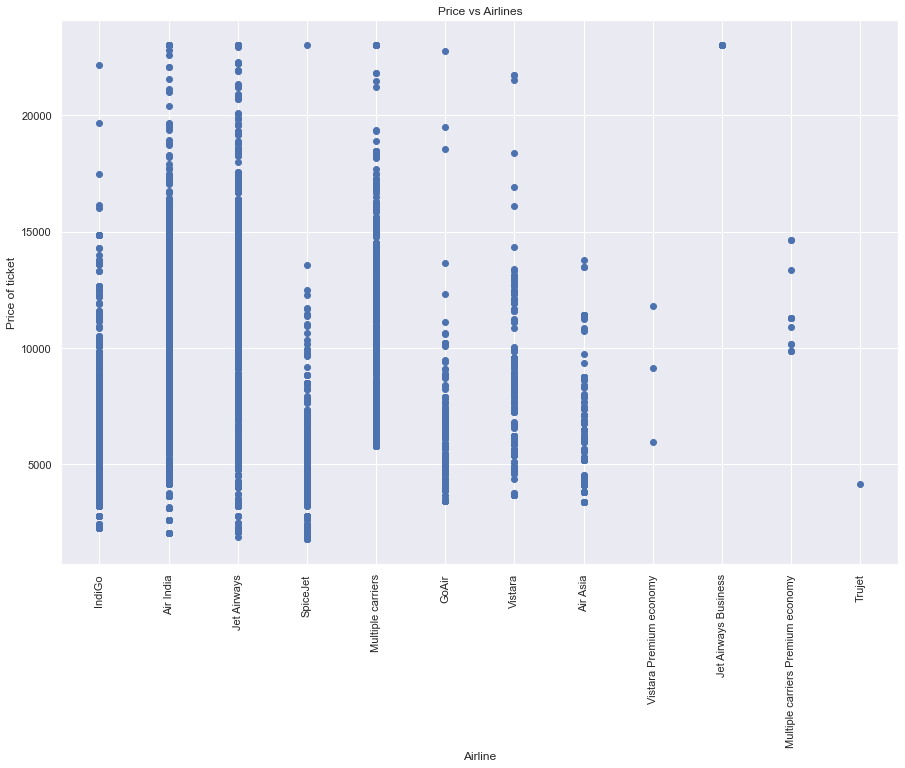

In [53]:
#plotting ticket prices and airlines
plt.figure(figsize=(15,10))
plt.title('Price vs Airlines')
plt.scatter(data_train['Airline'],data_train['Price'])
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.show()

here, as well jet airways has the highest among other airlines with their prices, but air india is also in the competition with other airlines. 

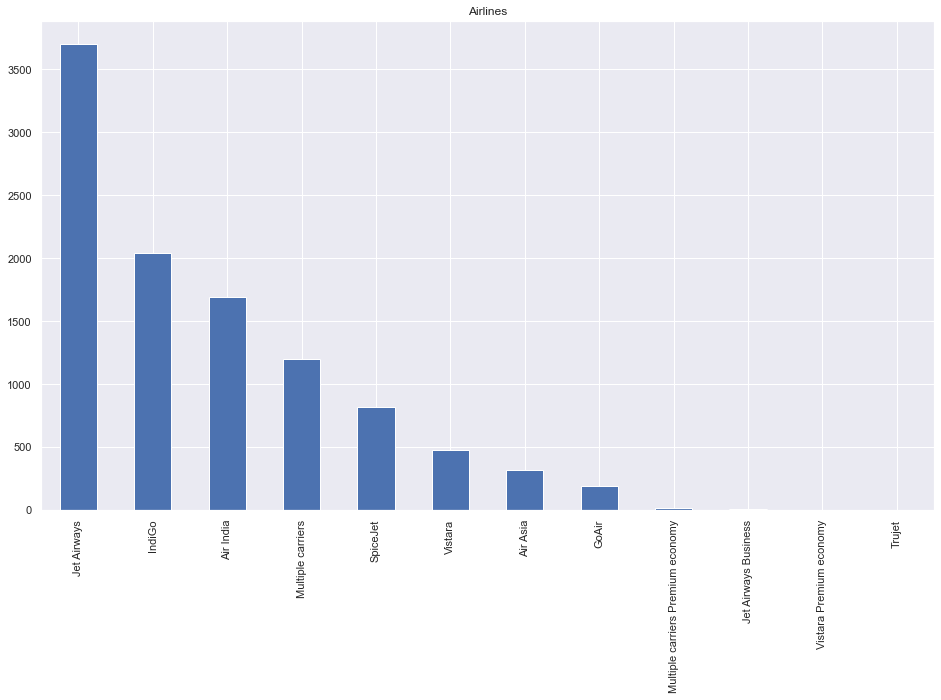

In [54]:
plt.subplot()
data_train['Airline'].value_counts().plot(kind='bar',title='Airlines',figsize=(16,9))
plt.xticks(rotation=90)
plt.show()

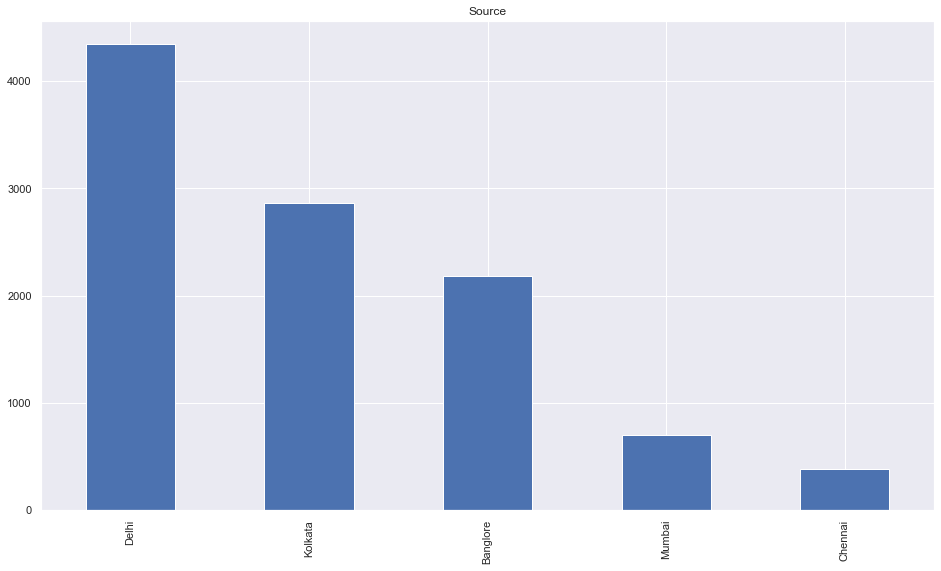

In [55]:
plt.subplot()
data_train['Source'].value_counts().plot(kind='bar',title='Source',figsize=(16,9))
plt.xticks(rotation=90)
plt.show()

 Delhi has the no. of highest source of airlines

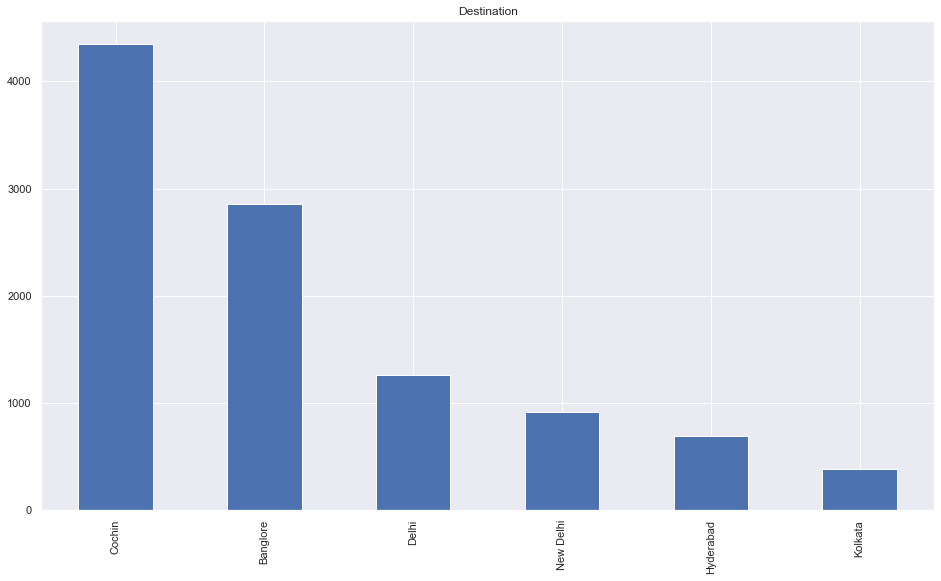

In [56]:
plt.subplot()
data_train['Destination'].value_counts().plot(kind='bar',title='Destination',figsize=(16,9))
plt.xticks(rotation=90)
plt.show()

Cochin has the largest area for the airlines to reach to their destination

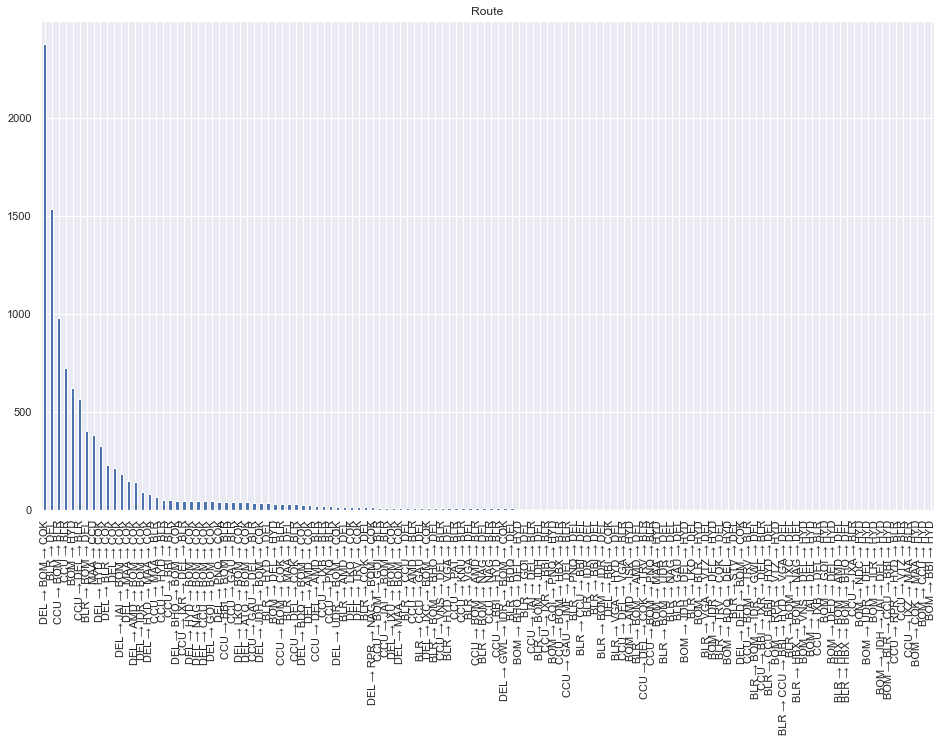

In [57]:
plt.subplot()
data_train['Route'].value_counts().plot(kind='bar',title='Route',figsize=(16,9))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

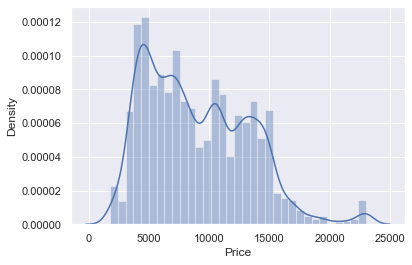

In [58]:
sns.distplot(data_train['Price'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

<Figure size 1080x720 with 0 Axes>

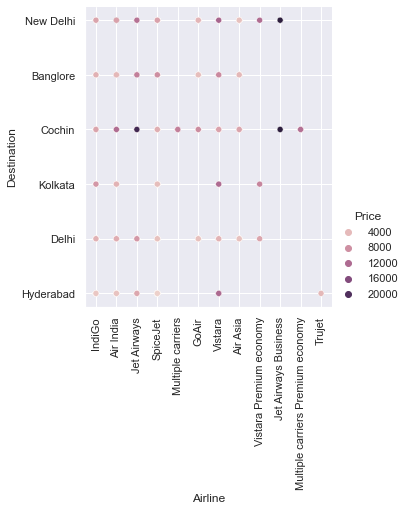

In [59]:
plt.figure(figsize=(15,10))
sns.relplot(x='Airline', y='Destination', hue='Price',data=data_train)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

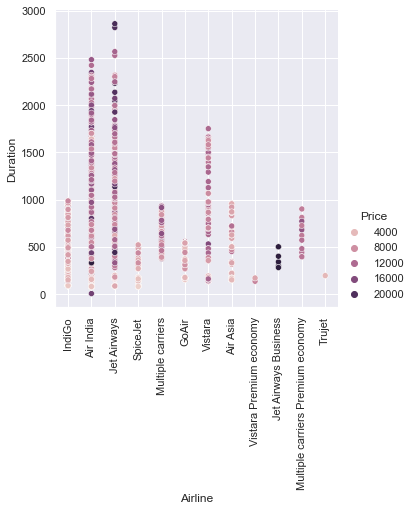

In [60]:
sns.relplot(x='Airline', y='Duration', hue='Price',data=data_train)
plt.xticks(rotation=90)

<AxesSubplot:>

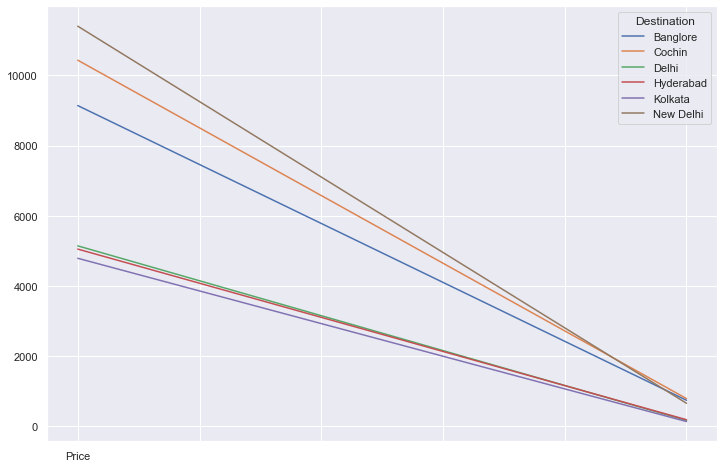

In [61]:
data_train.groupby('Destination')[['Price' , 'Airline' , 'Duration']].mean().T.plot(figsize=(12,8))

<AxesSubplot:>

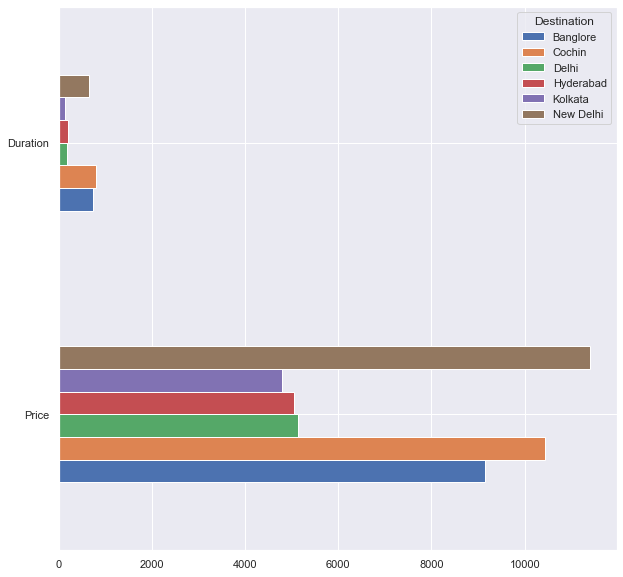

In [62]:
data_train.groupby('Destination')[['Price' , 'Airline' , 'Duration']].mean().T.plot(kind='barh' , figsize=(10,10))

<AxesSubplot:xlabel='Price'>

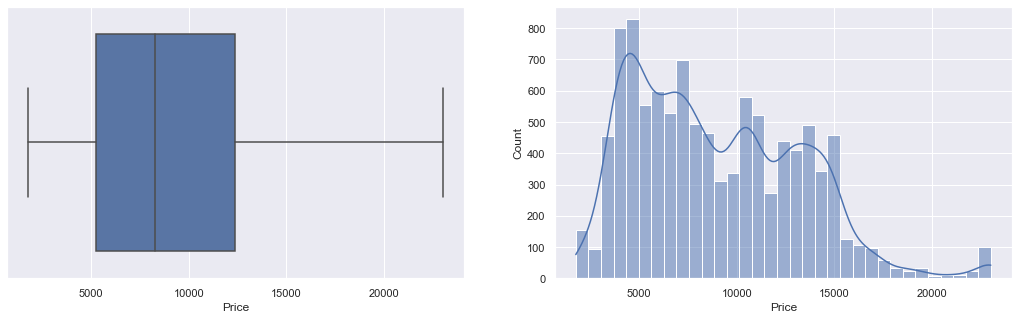

In [63]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,2)
sns.histplot(x='Price', data = data_train, kde=True)
plt.subplot(1,2,1)
sns.boxplot(x='Price', data = data_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Air Asia'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Trujet'),
  Text(8, 0, 'Multiple carriers'),
  Text(9, 0, 'Vistara Premium economy'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Jet Airways Business')])

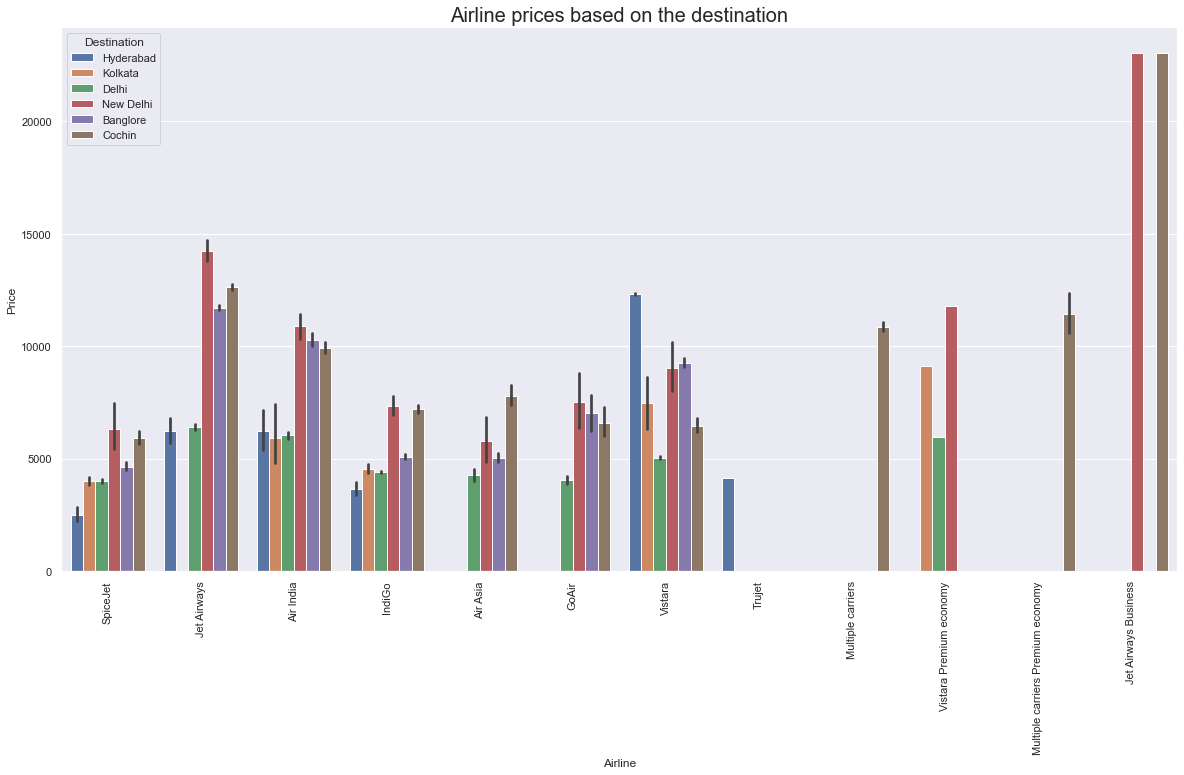

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x='Airline', y='Price', hue='Destination', data=data_train.sort_values("Price")).set_title('Airline prices based on the destination',fontsize=20);
plt.xticks(rotation=90)

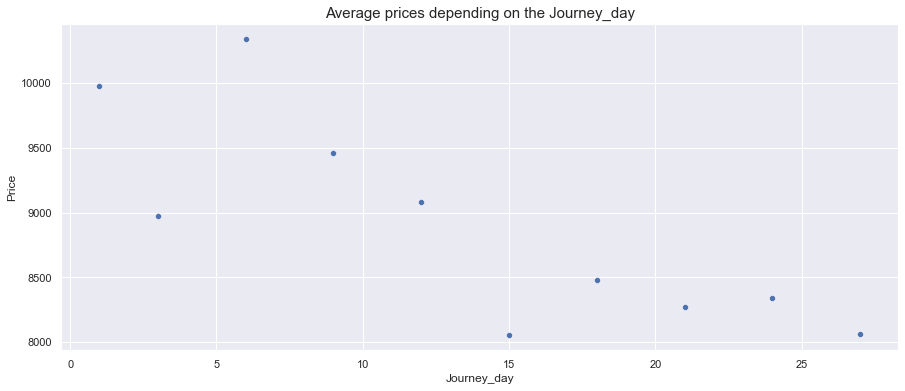

In [65]:
df_train = data_train.groupby(['Journey_day'])['Price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax=sns.scatterplot(x = "Journey_day", y="Price", data=df_train).set_title("Average prices depending on the Journey_day" , fontsize=15);

<AxesSubplot:xlabel='Journey_day', ylabel='Price'>

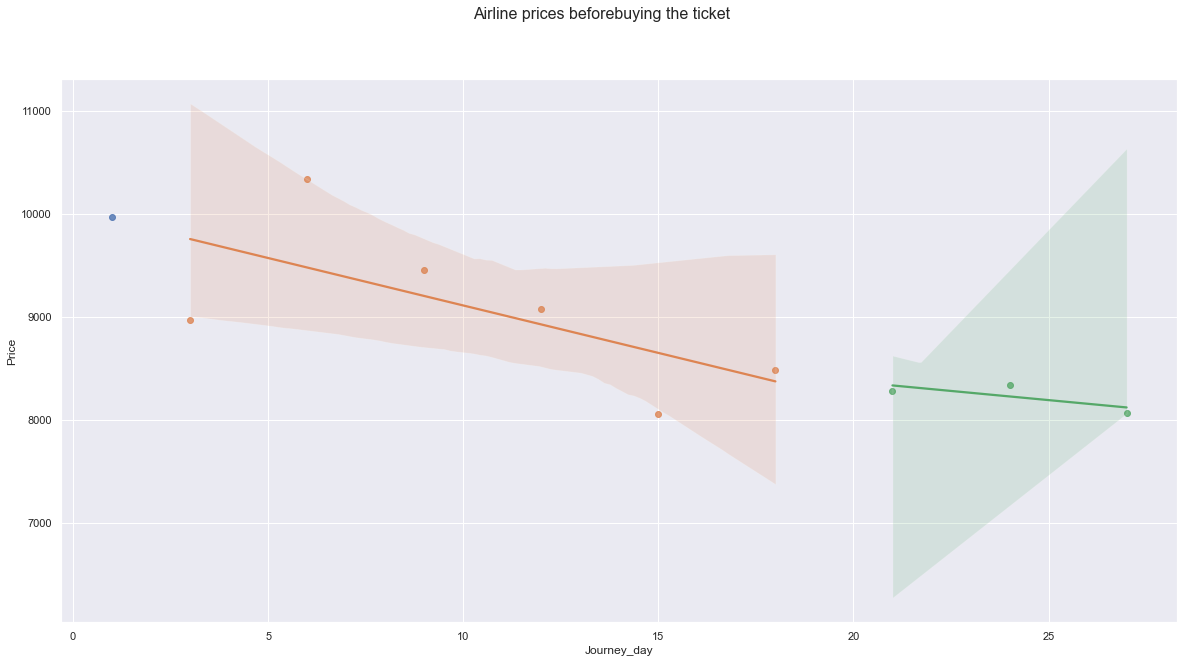

In [66]:
plt.figure(figsize=(20,10)).suptitle('Airline prices beforebuying the ticket' , fontsize=16)
ax=plt.axes()
sns.regplot(x=df_train.loc[df_train["Journey_day"]==1].Journey_day, y=df_train.loc[df_train["Journey_day"]==1].Price, fit_reg=False, ax=ax)
sns.regplot(x=df_train.loc[(df_train["Journey_day"]>1)&(df_train["Journey_day"]<20)].Journey_day, y=df_train.loc[(df_train["Journey_day"]>1)&(df_train["Journey_day"]<20)].Price, fit_reg=True, ax=ax)
sns.regplot(x=df_train.loc[df_train["Journey_day"]>=20].Journey_day, y=df_train.loc[df_train["Journey_day"]>=20].Price, fit_reg=True,ax=ax)

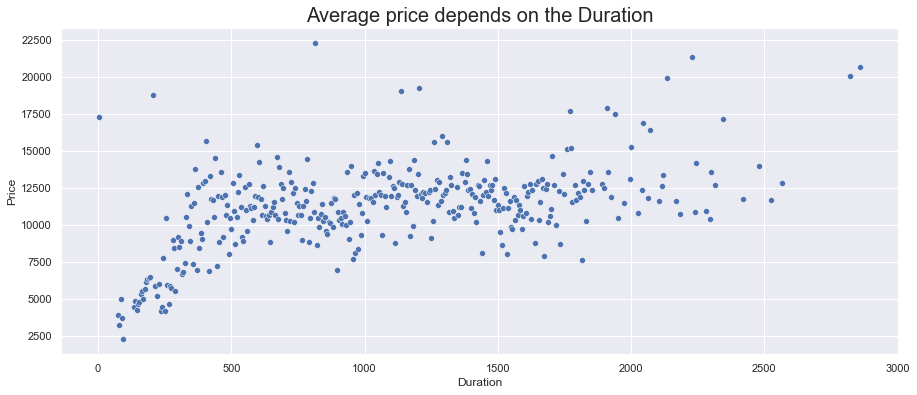

In [67]:
# LET'S CHECK THE PRICE CHANGE WITH THE DUARTION OF THE FLIGHT
df_train=data_train.groupby(['Duration'])['Price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax=sns.scatterplot(x="Duration", y="Price",data=df_train).set_title("Average price depends on the Duration", fontsize=20)

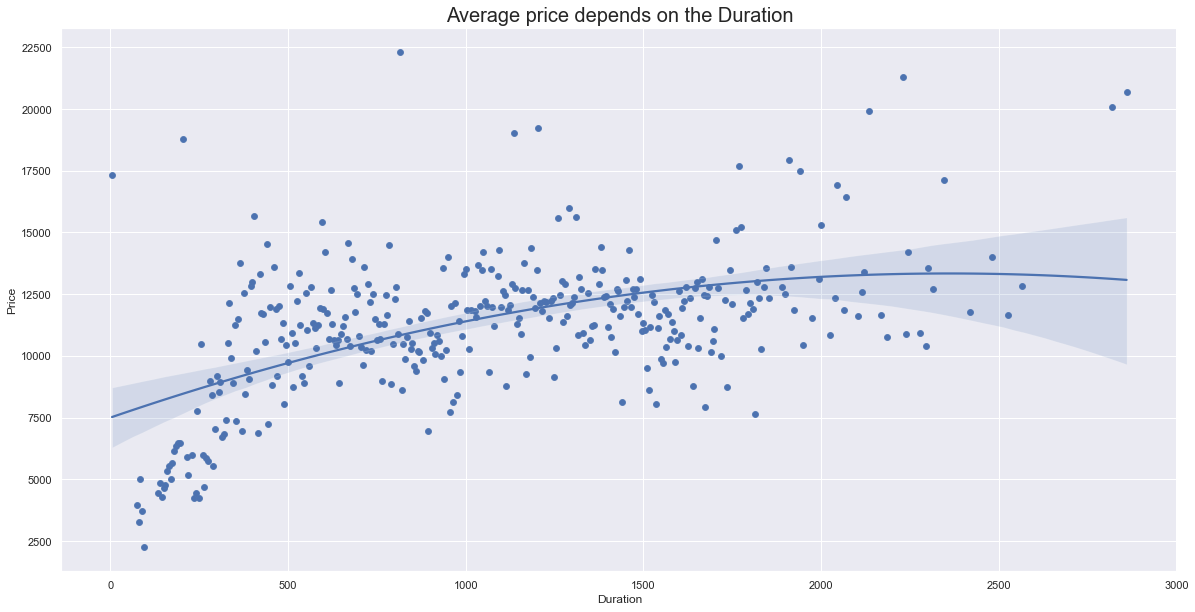

In [68]:
plt.figure(figsize=(20,10))
ax=sns.scatterplot(x="Duration", y="Price", data=df_train).set_title("Average price depends on the Duration", fontsize=20)
ax=sns.regplot(x="Duration", y="Price", data=df_train,order=2)

Text(0.5, 0.98, 'Airline price depends on the source and destination')

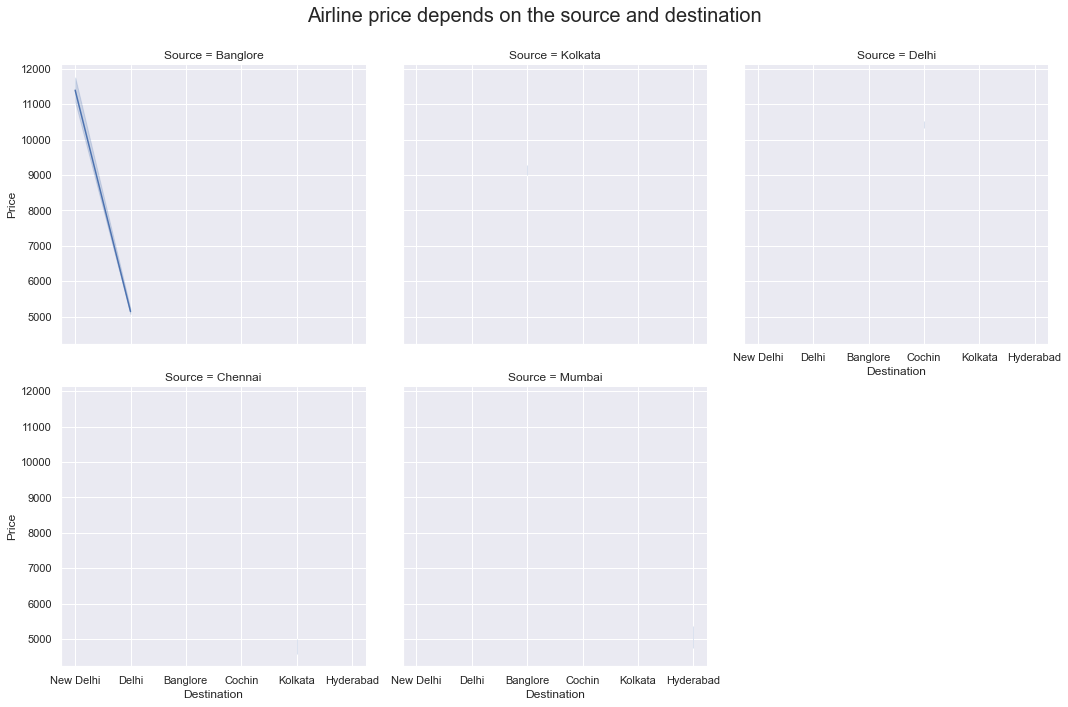

In [69]:
ax=sns.relplot(col="Source", y="Price",kind="line", x='Destination', data=data_train,col_wrap=3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline price depends on the source and destination', fontsize=20)

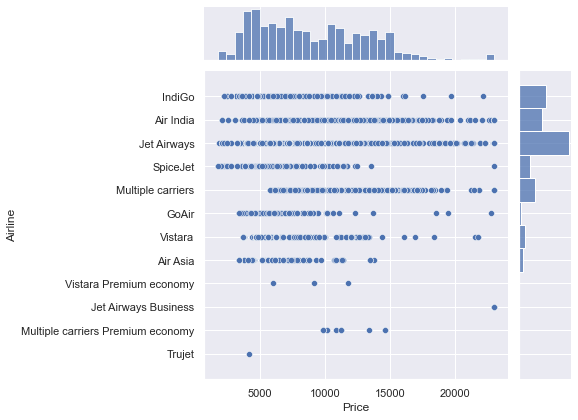

In [70]:
sns.jointplot(x='Price', y='Airline', data=data_train)
plt.xticks(rotation=90)
plt.show()

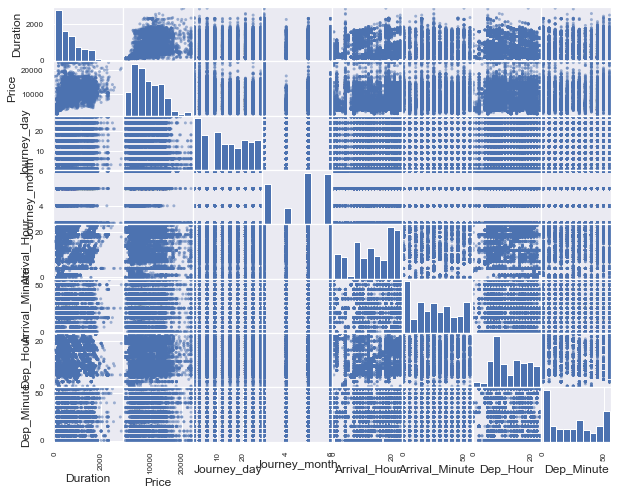

In [71]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train,figsize=(10,8),color='b')
plt.show()

<AxesSubplot:>

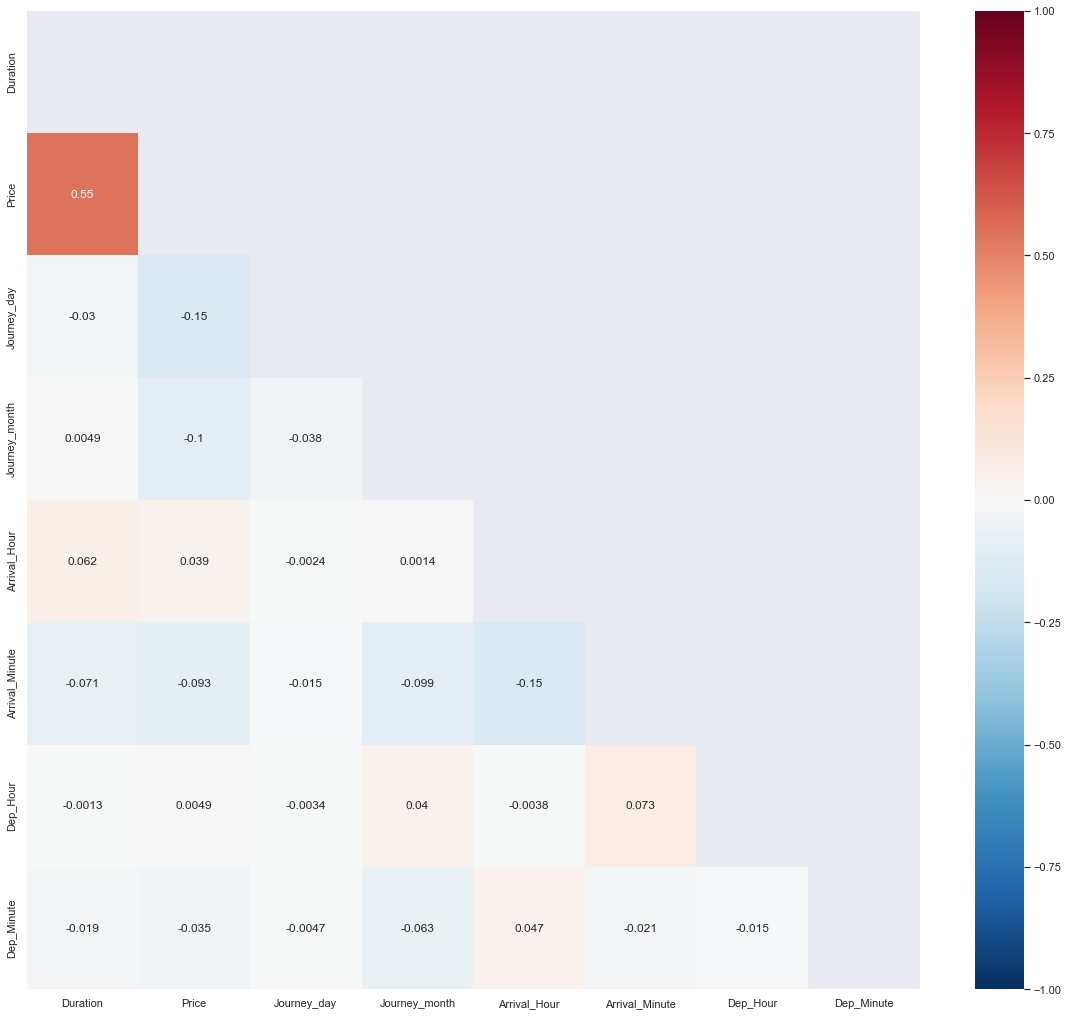

In [72]:
df=np.triu(np.ones_like(data_train.corr(),dtype=bool))
plt.figure(figsize=(20,18))
sns.heatmap(data_train.corr(),data=data_train,mask=df, annot=True, vmin=-1.0, vmax=1.0,center=0,cmap='RdBu_r')

In [73]:
source=data_train["Source"]
source=pd.get_dummies(source, drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [74]:
data_train["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [75]:
Destn=data_train[["Destination"]]
Destn=pd.get_dummies(Destn,drop_first=True)
Destn.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [76]:
data_train.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [77]:
data_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [78]:
data_train.replace({"non-stop" :0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops": 4}, inplace=True)

In [79]:
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50


In [80]:
 data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10462 non-null  object 
 1   Source          10462 non-null  object 
 2   Destination     10462 non-null  object 
 3   Duration        10462 non-null  int64  
 4   Total_Stops     10462 non-null  int64  
 5   Price           10462 non-null  float64
 6   Journey_day     10462 non-null  int32  
 7   Journey_month   10462 non-null  int32  
 8   Arrival_Hour    10462 non-null  int64  
 9   Arrival_Minute  10462 non-null  int64  
 10  Dep_Hour        10462 non-null  int64  
 11  Dep_Minute      10462 non-null  int64  
dtypes: float64(1), int32(2), int64(6), object(3)
memory usage: 1.2+ MB


In [81]:
data_train.shape

(10462, 12)

PREDICTING THE FLIGHT PRICE

In [82]:
# importing all mlpackages
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

In [83]:
df=data_train.dropna()
df.isna().sum()

Airline           0
Source            0
Destination       0
Duration          0
Total_Stops       0
Price             0
Journey_day       0
Journey_month     0
Arrival_Hour      0
Arrival_Minute    0
Dep_Hour          0
Dep_Minute        0
dtype: int64

In [84]:
X=df.drop(columns=['Price', 'Airline','Source', 'Destination' , 'Journey_day', 'Journey_month', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute'])
y=df.Price

In [85]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10462, dtype: float64

In [86]:
X

,Duration,Total_Stops
0,170,0
1,445,2
2,1140,2
3,325,1
4,285,1
...,...,...
10678,150,0
10679,155,0
10680,180,0
10681,160,0


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [89]:
print(selection.feature_importances_)

[0.46408343 0.53591657]


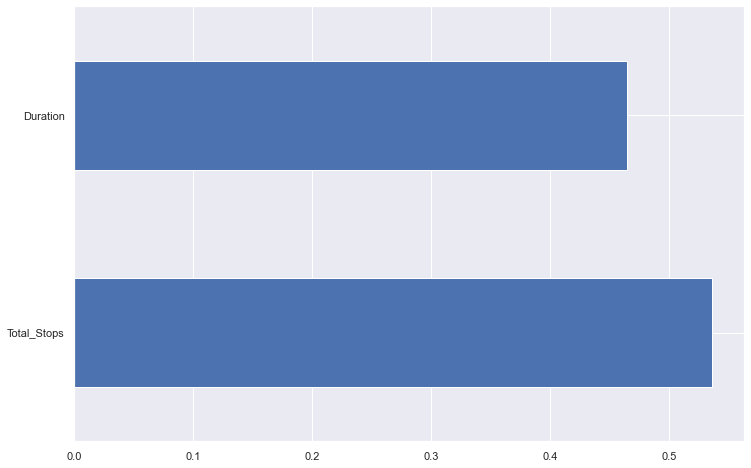

In [90]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [92]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
y_pred = reg_rf.predict(X_test)

In [94]:
reg_rf.score(X_train, y_train)

0.6045521364084501

In [95]:
reg_rf.score(X_test, y_test)

0.5517226644764379

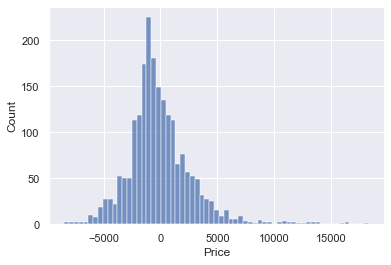

In [96]:
sns.histplot(y_test-y_pred)
plt.show()

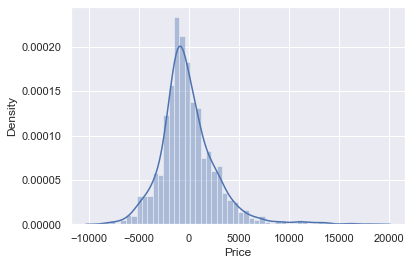

In [97]:
sns.distplot(y_test-y_pred)
plt.show()

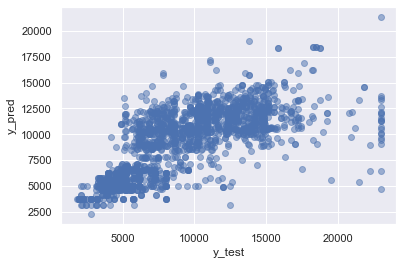

In [98]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [99]:
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :  2038.5379937433518
MSE :  8212292.896092962
RMSE :  2865.7098415738046


In [100]:
metrics.r2_score(y_test,y_pred)

0.5517226644764379

In [101]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features=['auto' , 'sqrt'] # no. of features to consider at each split
max_depth=[int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [102]:
random_grid = {'n_estimators' : n_estimators,
                       'max_features' : max_features,
                        'max_depth' : max_depth,
                        'min_samples_split' : min_samples_split,
                        'min_samples_leaf' : min_samples_leaf}

In [103]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [104]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [105]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [106]:
predictions=rf_random.predict(X_test)

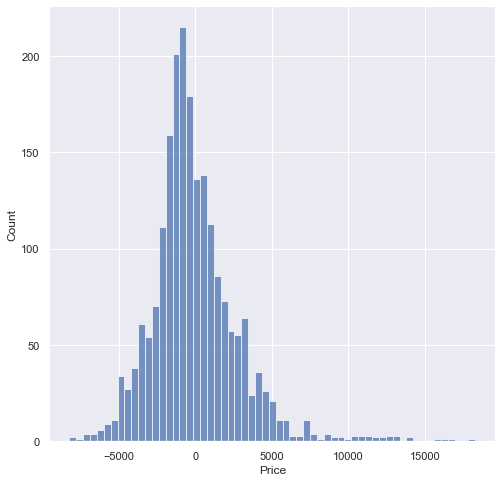

In [107]:
plt.figure(figsize=(8,8))
sns.histplot(y_test-predictions)
plt.show()

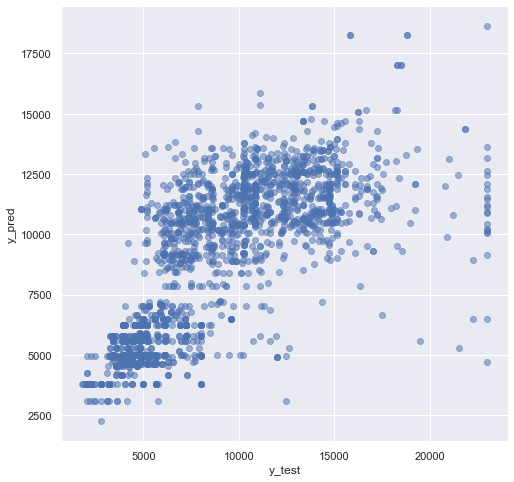

In [108]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predictions,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [109]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  2069.7906625624755
MSE:  8279729.992286657
RMSE:  2877.4519965216896


# CONCLUSION

PROBLEM STATEMENT:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

here, in the dataset  flight ticket prices rises with the accuracy of 80% and  jet airways has the highest accuracy among all airline

# THANK YOU